## Author- B Nikhil Sharma

### Objective- From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. 

#### Importing all the necessary tools

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
%matplotlib inline # We want our plots to be shown on the notebook

#### Importing the iris dataset

In [2]:
df = pd.read_csv("Iris.csv")

In [88]:
df.head() #Printing the first 5 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Description about the dataset

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [91]:
df.shape # to calculate number of rows and columns

(150, 6)

In [92]:
df["Species"].unique() #Unique values of species column

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Splitting the dataset into X and y

In [94]:
X= scale(df.iloc[:,1:5])
y= df.iloc[:,5]

In [97]:
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [98]:
y[:10]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [99]:
y.value_counts() #counting the number of different species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Finding the optimum number of clusters using the elbow method

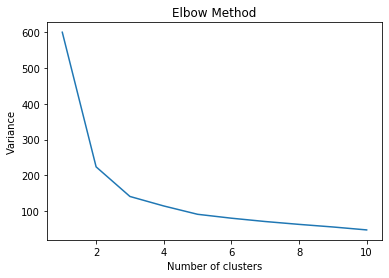

In [103]:
variance=[]
for i in range(1,11):
    clustering = KMeans(n_clusters=i,random_state=0)
    clustering.fit(X)
    variance.append(clustering.inertia_)

plt.plot(range(1,11),variance)
plt.xlabel("Number of clusters")
plt.ylabel("Variance")
plt.title("Elbow Method")
plt.show()

#### As we can above see the elbow appears to be at 3, so the optimum number of clusters are 3

### Fitting the model with optimum number of clusters

In [105]:
clustering = KMeans(n_clusters =3, random_state=0)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Predicting the species

In [106]:
y_preds = clustering.predict(X)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualizing the clusters on the first two columns

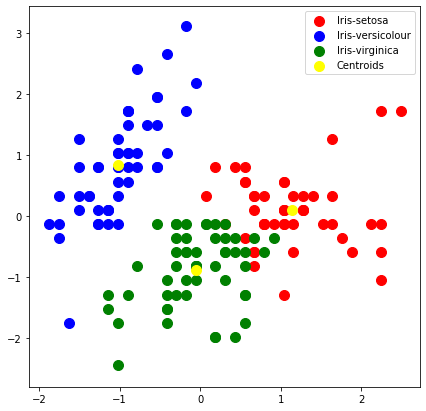

In [110]:
plt.figure(figsize=(7,7))
plt.scatter(X[y_preds == 0, 0], X[y_preds == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_preds == 1, 0], X[y_preds == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_preds == 2, 0], X[y_preds == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();